In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

In [4]:
x,y = sklearn.datasets.make_moons(200, noise = 0.20)

In [18]:
x # x and y coordinates of the points

array([[ 8.59211388e-01, -9.94092619e-01],
       [ 4.87725699e-01,  2.17024660e-01],
       [-5.69176219e-01,  5.51424918e-01],
       [ 5.59776585e-01, -5.71773981e-01],
       [ 1.06105413e+00, -1.21894336e-01],
       [ 1.35202089e+00,  1.68457946e-01],
       [ 4.20086841e-01,  6.51990230e-01],
       [-3.09898267e-02, -1.30715683e-02],
       [-2.80718518e-01,  8.37647912e-01],
       [-2.87046054e-01,  7.95708915e-01],
       [ 7.78607940e-01, -1.05636861e-02],
       [ 1.65681514e+00, -4.88466857e-01],
       [ 1.95936054e+00,  2.74993393e-01],
       [ 1.30153472e-01,  1.04061932e+00],
       [ 3.61288580e-02,  8.12490533e-01],
       [ 6.92681013e-01,  5.92115910e-02],
       [ 7.98412858e-01,  5.60884443e-01],
       [-7.73412213e-01,  8.49570938e-01],
       [ 5.84476099e-01,  1.07427333e+00],
       [ 1.52671514e+00, -8.69162813e-01],
       [ 5.71066664e-01,  1.22015148e+00],
       [ 9.06970435e-02,  1.89930020e-01],
       [ 1.49242849e+00, -4.00858255e-01],
       [ 7.

In [19]:
y # labels of the points

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

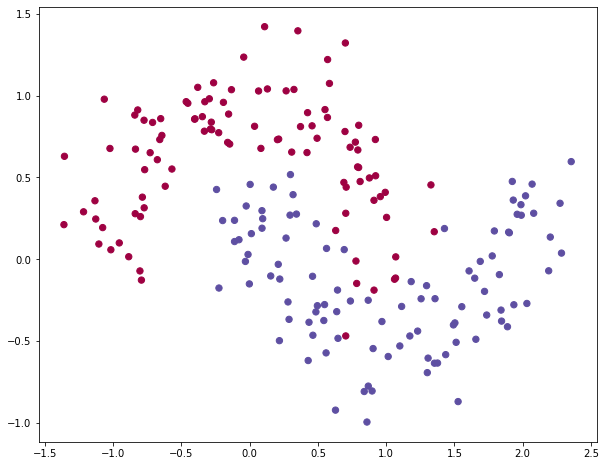

In [22]:
plt.scatter(x[:,0],x[:,1], s = 40, c = y, cmap = plt.cm.Spectral)
plt.show();

In [23]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [25]:
x.dtype,y.dtype

(torch.float32, torch.int64)

In [26]:
class FeedForward(torch.nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward,self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons,output_neurons)
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [27]:
network = FeedForward(input_neurons = 2, hidden_neurons = 50, output_neurons = 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
loss_function = torch.nn.CrossEntropyLoss()

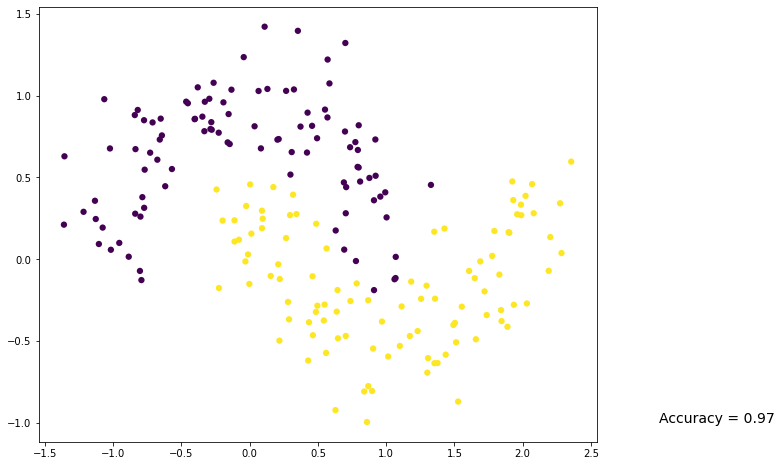

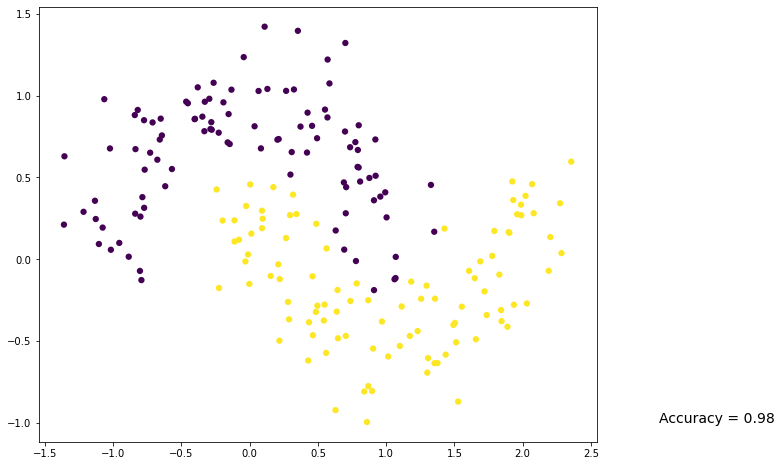

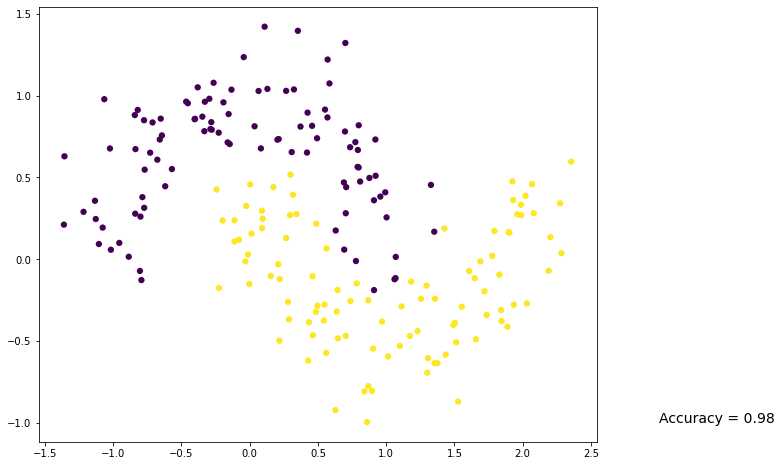

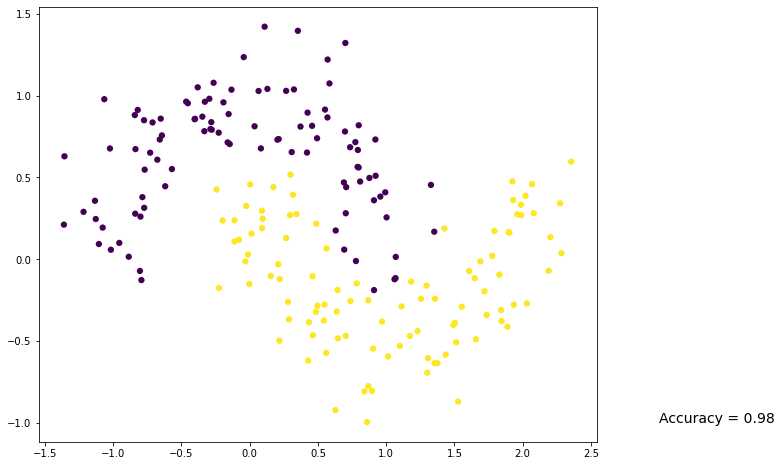

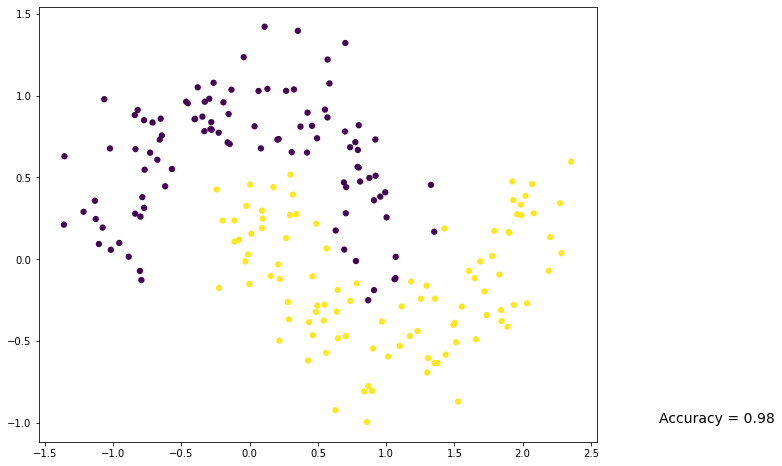

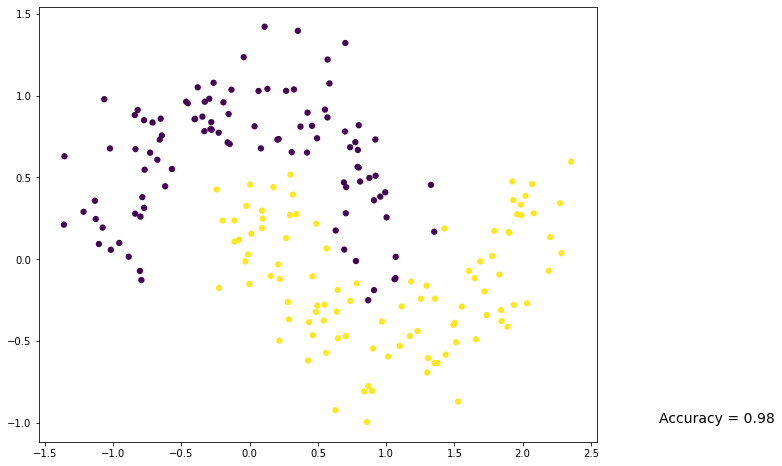

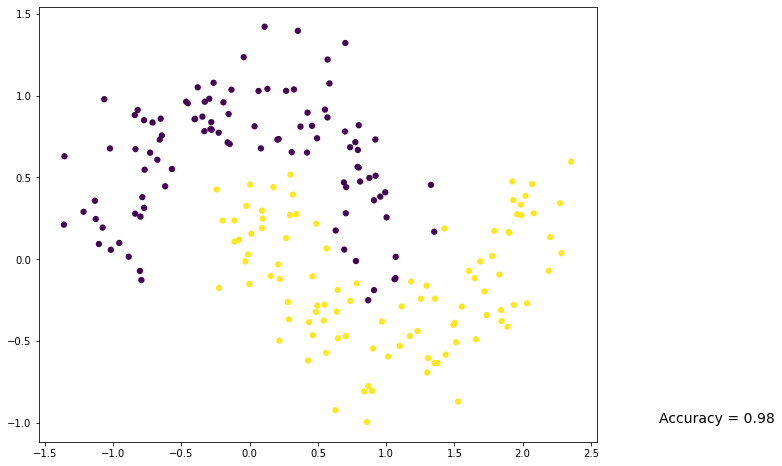

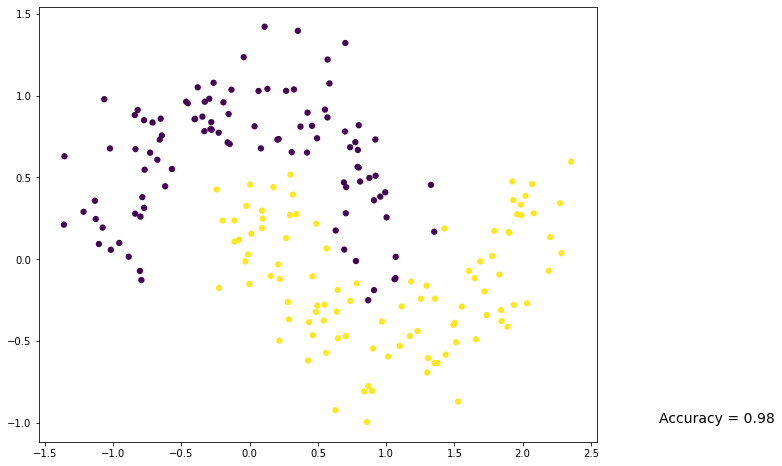

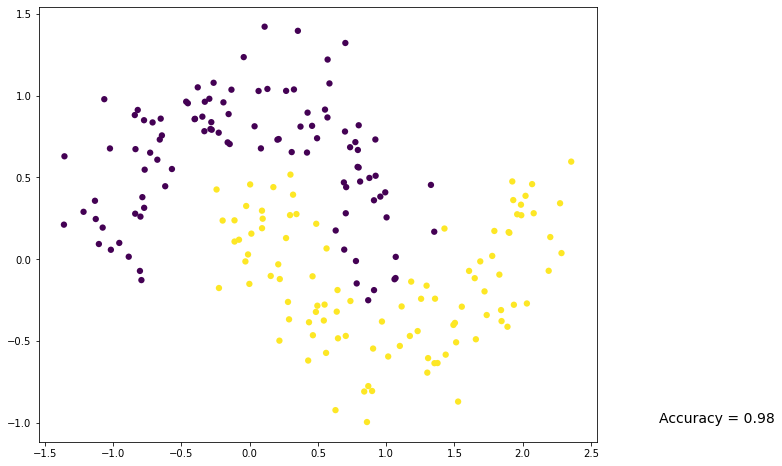

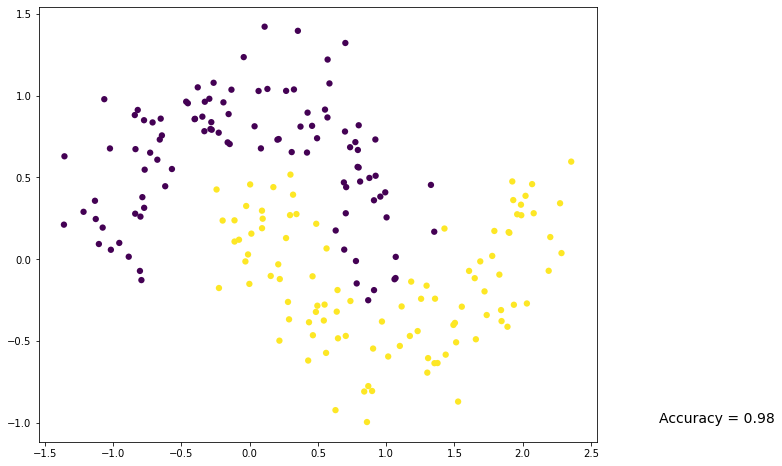

In [29]:
plt.ion()
for epoch in range(10000):
    out = network(x)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
         # show the learning process up until now
        max_value, prediction = torch.max(out,1)
        # print(max_value, prediction)
        predicted_y = prediction.data.numpy() # convert tensor to numpy array for matplotlib
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)

plt.ioff()        
plt.show()